# Home Work
## Introduction to Linear Regression



||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|classification|
|**unsupervised**|dimension reduction|clustering|

We will forecast the revenue of the company depending on the level of its investments in advertising on TV, in newspapers and on radio.

## Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods



In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

# this allows plots to appear directly in the notebook
%matplotlib inline

In [11]:
# imports
import seaborn as sns

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [5]:
# read data into a DataFrame
data = pd.read_csv('../data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

In [21]:
# Compute pairwise correlation of columns, excluding NA/null values

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [22]:
# Generates descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


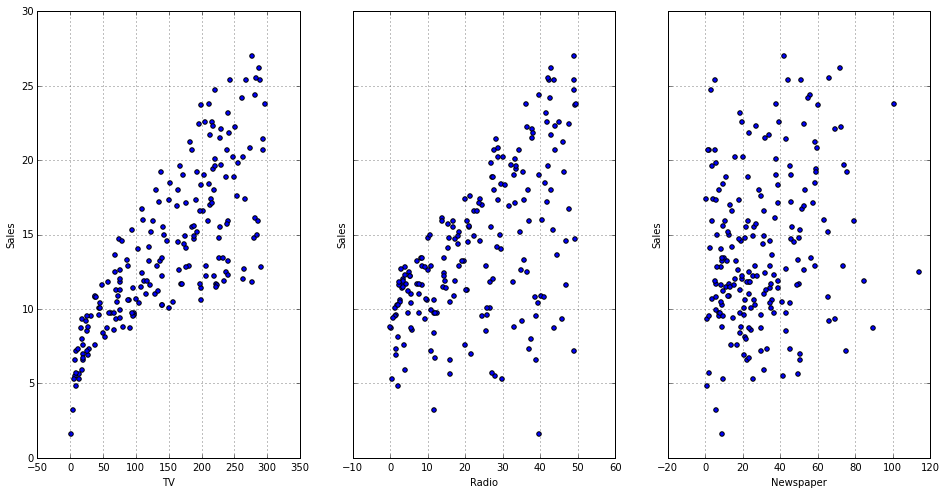

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

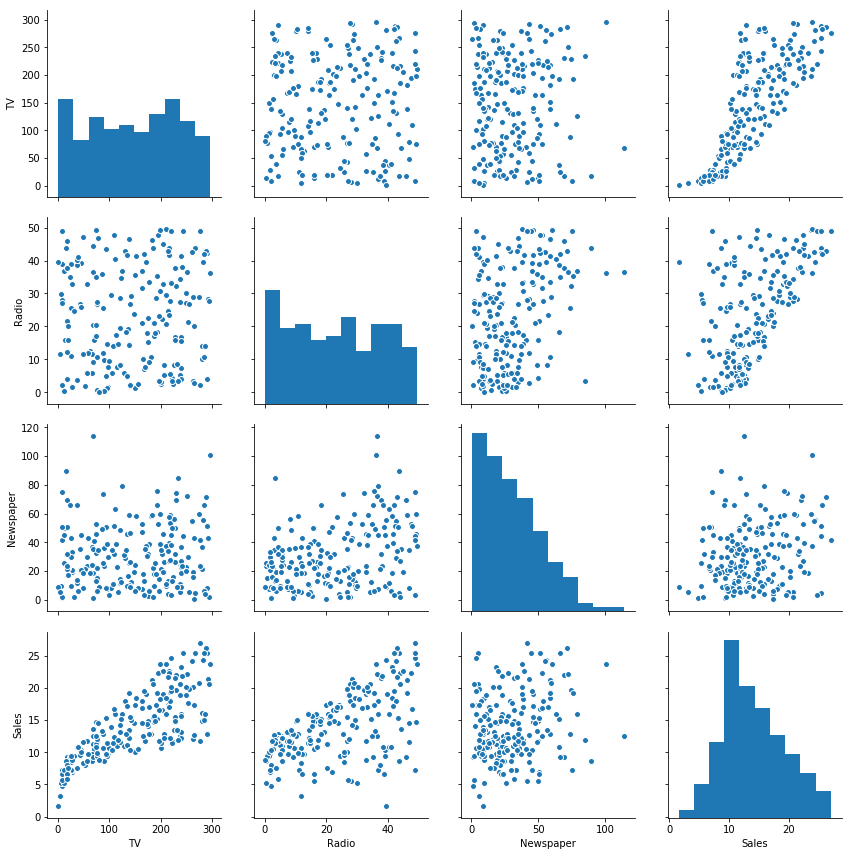

In [14]:
sns.pairplot(data, size=3)

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

# Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

## Quality functional
Linear regression uses a simple quality functional - the root-mean-square error. We will work with a sample containing 3 characteristics. To adjust the parameters (weights) of the model, the following task is solved:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$

where $x_{i1}, x_{i2}, x_{i3}$ are the values of the attributes of the $i$-th object, $y_i$ - is the value of the target attribute of the $i$-th object, $\ell$ - is the number of objects in the training sample.

## Gradient descent
The parameters $w_0, w_1, w_2, w_3$, along which the root-mean-square error is minimized, can be found numerically by means of gradient descent.
The gradient step for the scales will look like this:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Here $\eta$ is the parameter, the gradient descent step.

## Stochastic gradient descent
The problem of gradient descent, described above, is that at large steps it is possible to consider the gradient from all available data at every step as very computationally difficult.
In the stochastic version of the gradient descent corrections for weights are calculated only taking into account one randomly taken object of the training sample:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
where $k$ - is a random index, $k \in \{1, \ldots, \ell\}$.

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Linear Regression in scikit-learn



In [6]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: instantiate, fit

lm = linear_model.LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 0.0457646454553976), ('Radio', 0.18853001691820442), ('Newspaper', -0.0010374930424763285)]


In [8]:
# predict for a new observation
print(lm.predict([[100, 25, 25]]))

[12.20266701]


The score here is the $R^2$ score, or coefficient of determination, which measures how well a model performs relative to a simple mean of the target values. $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.

In [9]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789521

## Home Work

## Task 1

Scale the columns of the matrix X, subtracting from each value the average over the corresponding column and dividing the result by the standard deviation. For definiteness, use the mean and std methods of the NumPy vectors (the std implementation in Pandas may differ). Note that in numpy, the call to the .mean () function without parameters returns the average for all elements of the array, and not for the columns, as in pandas. To calculate by columns, you must specify the axis parameter.

means, stds =.....

X =

Using linear regression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), build and train a model. Calculate $R^2$ score. Calculate "Mean absolute error regression loss" from module metrics: metrics.mean_absolute_error(.....)

The score here is the $R^2$ score, or coefficient of determination, which measures how well a model performs relative to a simple mean of the target values. $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.

Calculate predict for a new observation [100, 25, 25]
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  - 100
- Radio: advertising dollars spent on Radio -25
- Newspaper: advertising dollars spent on Newspaper  - 25

In [36]:
#Your code here


## Task 2

Shuffle the sample using shuffle from  sklearn.utils 

data_shuffled = shuffle(......)

In [ ]:
#Your code here

Use a different approach: Scale, or standardize the characteristics: from each feature subtract its average and divide by the standard deviation. This can be done with the scale method.

X =scale(....)

In [11]:
#Your code here


To build a quality metric from the result of learning, you need to divide the original dataset into learning and test samples.

We pay attention to the given parameter for the random number generator: random_state. Since the learning and test results will depend on how you separate the objects, it is suggested that you use a predetermined value to obtain the results agreed with the responses in the job verification system.

train_data, test_data, train_labels, test_labels=model_selection.train_test_split(..... ,test_size=0.3, random_state=1)

In [ ]:
#Your code here


Using linear regression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), build and train a model. Calculate $R^2$ score on the test samples. Calculate "Mean absolute error regression loss" from module metrics: metrics.mean_absolute_error(.....) on the test samples.

In [12]:
#Your code here


Calculate predict for a new observation [100, 25, 25]
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  - 100
- Radio: advertising dollars spent on Radio -25
- Newspaper: advertising dollars spent on Newspaper  - 25

#Your code here


Using sklearn.linear_model.SGDRegressor (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), build and train a model.  Calculate $R^2$ score on the test samples. Calculate "Mean absolute error regression loss" from module metrics: metrics.mean_absolute_error(.....) on the test samples.

Calculate predict for a new observation [100, 25, 25]
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  - 100
- Radio: advertising dollars spent on Radio -25
- Newspaper: advertising dollars spent on Newspaper  - 25

In [ ]:
#Your code here
